In [1]:
%run initialize.py
import dataset as ds
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Python version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
IPython version: 5.3.0
pandas version: 0.20.1 name: pd
NumPy version: 1.12.1 name: np
SciPy version: 0.19.0 name: sp
scikit-learn version: 0.18.1 name: skl
plotly version: 2.0.11 name: py
matplotlib version: 2.0.2 name: mpl


# Two-Span Continuous Steel

Load data.

In [2]:
brg_data = ds.load_dataset('data/parameters_2.csv', filetype='csv', index_first_col=True)
fea_data = ds.load_dataset('data/fedata_2.csv', filetype='csv', index_first_col=True)
tol_data = ds.load_dataset('data/toldata_2.csv', filetype='csv', index_first_col=True)

## Longitudinal Movement at Abutment

### Strength I Flexure

In [3]:
np.arange(0.01,0.25,0.01)

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24])

In [4]:
sl_ratio = brg_data['gdr_spacing']/brg_data['length']

a = 10
b = 0.01

r = np.arange(0.01,0.3,0.001)
delta = (2/(a*(r-b)))

trace0 = py.graph_objs.Scatter(x = sl_ratio,y = tol_data['st1tol_LDabt'],mode = 'markers')
trace1 = py.graph_objs.Scatter(x = r[r>b],y = delta[r>b])

data = [trace0, trace1]
layout = py.graph_objs.Layout(xaxis=dict(range=[0, 0.3]),yaxis=dict(range=[0, 25]))

fig = py.graph_objs.Figure(data=data, layout=layout)
iplot(fig)        

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in true_divide



In [5]:
sl_ratio = brg_data['gdr_spacing']/brg_data['length']

a = 10
b = 0.0

r = np.arange(0.01,0.3,0.001)
delta = (2/(a*(r-b)))-1
r1 = 60/np.arange(50*12,160*12,1)
delta1 = (2/(a*(r1-b)))-1
r2 = 144/np.arange(50*12,160*12,1)
delta2 = (2/(a*(r2-b)))-1

trace0 = py.graph_objs.Scatter(x = sl_ratio,y = tol_data['st1tol_LDabt'],mode = 'markers')
trace1 = py.graph_objs.Scatter(x = r[r>b],y = delta[r>b])
trace2 = py.graph_objs.Scatter(x = r1,y = delta1)
trace3 = py.graph_objs.Scatter(x = r2,y = delta2)

data = [trace0, trace1,trace2,trace3]
layout = py.graph_objs.Layout(xaxis=dict(range=[0, 0.3]),yaxis=dict(range=[0, 25]))

fig = py.graph_objs.Figure(data=data, layout=layout)
iplot(fig)   

In [6]:
r1

array([ 0.1       ,  0.09983361,  0.09966777, ...,  0.0312989 ,
        0.03128259,  0.03126628])

In [40]:
# create X and y
feature_cols = ['length','gdr_spacing']
X = brg_data[feature_cols]
y = tol_data.st1tol_LDabt

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# # print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
lm.score(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

-1.30848728847
[ 0.00816178 -0.00365508]


0.72182403242445603

In [46]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

,length,gdr_spacing,sl,tol
id,,,,
Steel_2_1_1,1376.474610,117.750299,0.085545,10.490329
Steel_2_1_2,1665.069834,78.771605,0.047308,5.656952
Steel_2_1_3,939.042604,118.032984,0.125695,4.815261
Steel_2_1_4,1796.698848,63.640192,0.035421,11.496153
Steel_2_1_5,1365.806459,123.537135,0.090450,10.249688


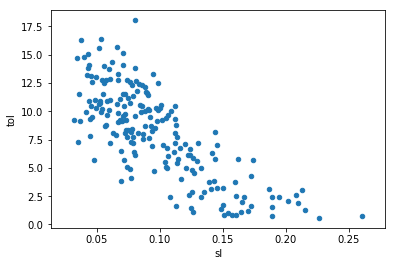

In [79]:
frames = [brg_data[['length','gdr_spacing']],sl_ratio, tol_data.st1tol_LDabt]
data = pd.concat(frames,axis=1)
data.columns = ['length','gdr_spacing','sl', 'tol']
data.head()
# visualize the relationship between the features and the response using scatterplots
# fig, axs = plt.subplots(1, 3, sharey=True)
# data.plot(kind='scatter', x='length', y='tol', ax=axs[0], figsize=(20, 5))
# data.plot(kind='scatter', x='gdr_spacing', y='tol', ax=axs[1])
data.plot(kind='scatter', x='sl', y='tol')

In [80]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='tol ~ sl', data=data).fit()

# print the coefficients
lm.params

Intercept    14.908156
sl          -69.738295
dtype: float64

In [84]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'sl': [data.sl.min(), data.sl.max()]})
X_new.head()

,sl
0,0.031993
1,0.260105


In [85]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    12.677000
1    -3.231134
dtype: float64

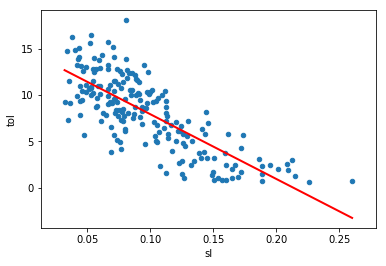

In [86]:
# first, plot the observed data
data.plot(kind='scatter', x='sl', y='tol')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [87]:
lm.rsquared

0.5973568642787459

### Service II Flexure

### Strength I Shear

## Longitudinal Movement at Pier

### Strength I Flexure

### Service II Flexure

### Strength I Shear